In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import pingouin
from scipy.stats import chi2_contingency

Mounted at /content/drive


In [ ]:
#file paths
populationFile = '/content/drive/MyDrive/Team 55 [NEW]/Data/Clean Data/Population_FullClean.csv'
povertyFile = '/content/drive/MyDrive/Team 55 [NEW]/Data/Clean Data/Poverty_FullClean.csv'
medianIncomeFile = '/content/drive/MyDrive/Team 55 [NEW]/Data/Clean Data/Median_Income_FullClean.csv'
povertyPercentFile = '/content/drive/MyDrive/Team 55 [NEW]/Data/Clean Data/Poverty_Percent_FullClean.csv'

#create dfs
population_df_original = pd.read_csv(populationFile)
poverty_df_original = pd.read_csv(povertyFile)
median_income_df_original = pd.read_csv(medianIncomeFile)
poverty_percent_df_original = pd.read_csv(povertyPercentFile)

In [ ]:
#transposing the Population Dataframe to make years into columns
population_df = population_df_original.copy(deep = True)
population_df = population_df.transpose()
population_df.columns = population_df.iloc[0]
population_df = population_df.drop(population_df.index[0])
population_df['Year'] = population_df.index
#population_df['Year'] = pd.to_datetime(population_df['Year']).dt.to_period('Y')

#dropping some counties to get less data
#drop_list = ["Washington Parish","St. Bernard Parish", "St. Charles Parish", "St. James Parish", "St. John the Baptist Parish", "St. Tammany Parish", "Tangipahoa Parish", "Ascension Parish", "East Feliciana Parish", "Iberville Parish", "Pointe Coupee Parish", "St. Helena Parish", "West Baton Rouge Parish", "West Feliciana Parish", "Caddo Parish"]
#population_df = population_df.drop(columns = drop_list)

# melt the data to plot it
population_df = population_df.melt(id_vars=["Year"], var_name="County", value_name="Value")
#population_df

In [ ]:
population_df.tail()

,Year,County,Value
415,2016,West Feliciana Parish,15322
416,2017,West Feliciana Parish,15373
417,2018,West Feliciana Parish,15474
418,2019,West Feliciana Parish,15570
419,2020,West Feliciana Parish,15491


In [ ]:
poverty_df = poverty_df_original.copy(deep = True)
poverty_df = poverty_df.transpose()
poverty_df.columns = poverty_df.iloc[0]
poverty_df = poverty_df.drop(poverty_df.index[0])
poverty_df['Year'] = poverty_df.index

poverty_df = poverty_df.melt(id_vars=["Year"], var_name="County", value_name="Value")

In [ ]:
poverty_df.tail()

,Year,County,Value
415,2016,West Feliciana Parish,2372
416,2017,West Feliciana Parish,2113
417,2018,West Feliciana Parish,2470
418,2019,West Feliciana Parish,2261
419,2020,West Feliciana Parish,2217


In [ ]:
median_income_df = median_income_df_original.copy(deep = True)
median_income_df = median_income_df.transpose()
median_income_df.columns = median_income_df.iloc[0]
median_income_df = median_income_df.drop(median_income_df.index[0])
median_income_df['Year'] = median_income_df.index

median_income_df = median_income_df.melt(id_vars=["Year"], var_name="County", value_name="Value")

In [ ]:
median_income_df.tail()

,Year,County,Value
415,2016,West Feliciana Parish,56459
416,2017,West Feliciana Parish,56584
417,2018,West Feliciana Parish,60296
418,2019,West Feliciana Parish,65296
419,2020,West Feliciana Parish,58499


In [ ]:
poverty_percent_df_original.tail()

,County,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
15,St. Tammany Parish,10.1,11.0,10.4,10.5,11.2,11.0,9.9,11.2,10.0,...,11.8,13.1,11.0,11.2,12.5,9.8,11.1,11.8,11.5,10.0
16,Tangipahoa Parish,21.1,22.6,22.3,20.8,22.2,23.3,24.9,22.9,22.2,...,22.9,24.4,22.2,22.5,24.0,21.5,20.9,17.9,21.7,20.1
17,Washington Parish,23.0,24.5,24.1,23.3,25.5,24.5,27.5,25.5,24.1,...,31.3,26.1,25.4,29.1,26.2,27.8,23.1,24.6,24.9,22.5
18,West Baton Rouge Parish,14.0,14.1,13.8,15.5,16.8,16.5,17.1,16.9,16.1,...,15.6,17.2,16.4,20.5,15.1,16.8,13.5,12.8,14.4,14.6
19,West Feliciana Parish,19.3,22.0,21.2,18.5,20.4,21.5,21.7,22.5,21.9,...,22.6,26.4,24.4,24.0,23.9,23.7,21.0,24.4,22.1,21.9


In [ ]:
poverty_percent_df = poverty_percent_df_original.copy(deep = True)
poverty_percent_df = poverty_percent_df.transpose()
poverty_percent_df.columns = poverty_percent_df.iloc[0]
poverty_percent_df = poverty_percent_df.drop(poverty_percent_df.index[0])
poverty_percent_df['Year'] = poverty_percent_df.index

#poverty_percent_df = poverty_percent_df.melt(id_vars=["Year"], var_name="County", value_name="Value")



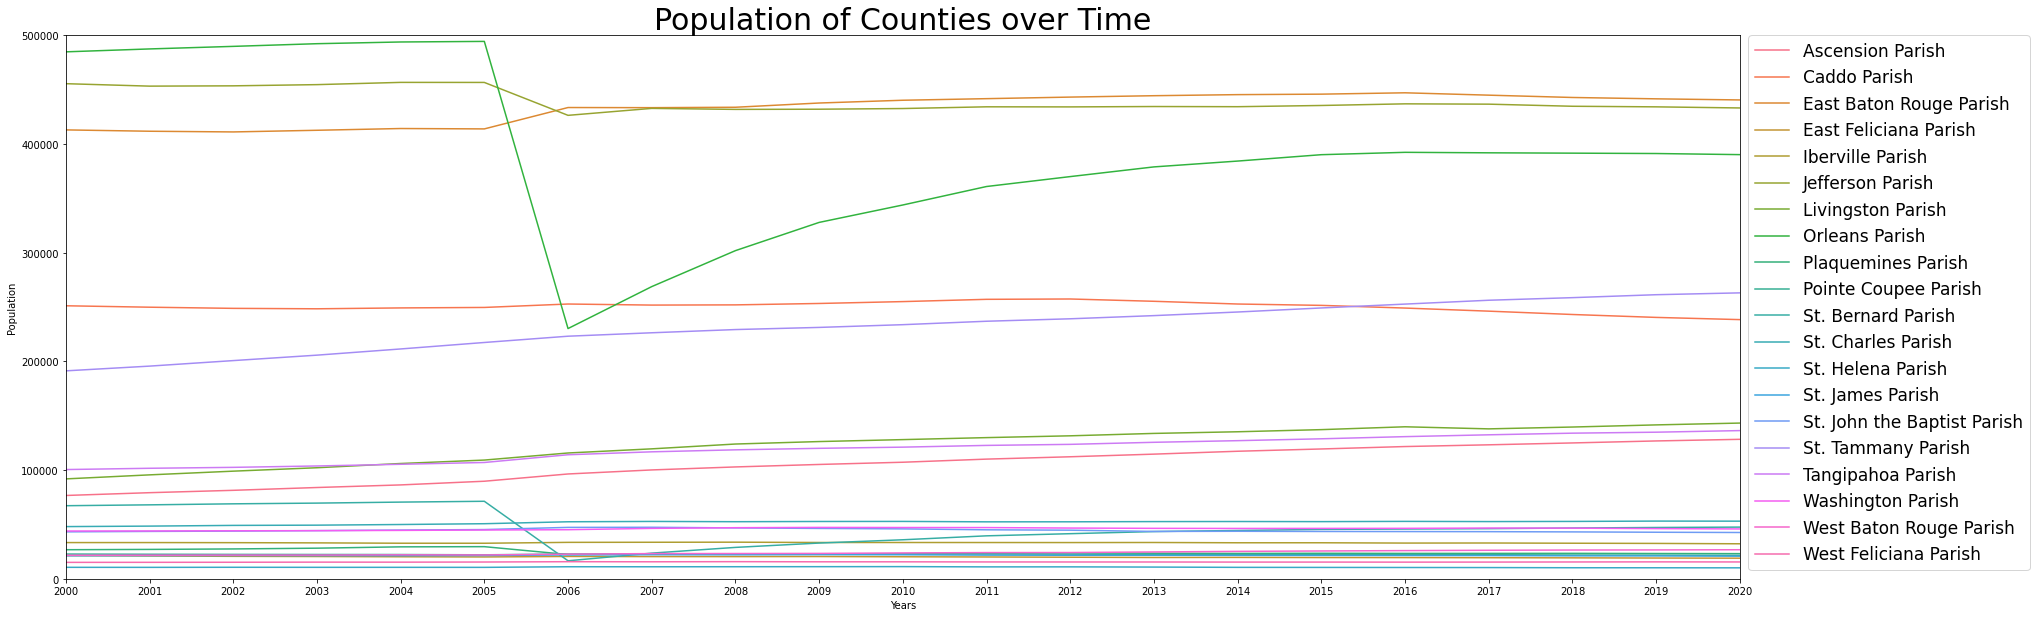

In [ ]:
#plot of Population
fig, ax = plt.subplots(figsize=(30,10))
ax.set(xlabel='Years', ylabel='Population',xlim=(0,20),ylim=(0,500000))
ax.set_title( label='Population of Counties over Time', fontsize=30)
sns.lineplot(x='Year',y='Value',data = population_df, hue = 'County', ax=ax)
plt.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0., fontsize=17)